In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import os

In [2]:
symbol = "^NSEI"
start = "2018-09-14"
end = "2023-09-14"

In [10]:
First_wave_start = pd.to_datetime("2020-03-21")
First_wave_end = pd.to_datetime("2020-05-31")
Second_wave_start = pd.to_datetime("March 13, 2021")
first_news_india = pd.to_datetime('30 January 2020')
first_news_worldwide = pd.to_datetime('10 January 2020')
nov_2019 = pd.to_datetime('2019-11-10')

In [3]:
outpath_plot = "/home/satyukt/Sarthak/repository/NSE_analysis_duringCovid/plots"
out_path_csv = "/home/satyukt/Sarthak/repository/NSE_analysis_duringCovid/csv"

In [4]:
nifty = yf.download(symbol, start, end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
df = nifty.reset_index()
df["Date"] = pd.to_datetime(df.Date).copy()
df["Day"] = df.Date.dt.day_name()
column_to_move = df.pop("Day")
df.insert(1, "Day", column_to_move)
df.to_csv("../csv/Nifty50_covidData.csv", index=False)

In [23]:
# for weekly option expiry
df_thus = df.loc[df.Day == "Thursday"]

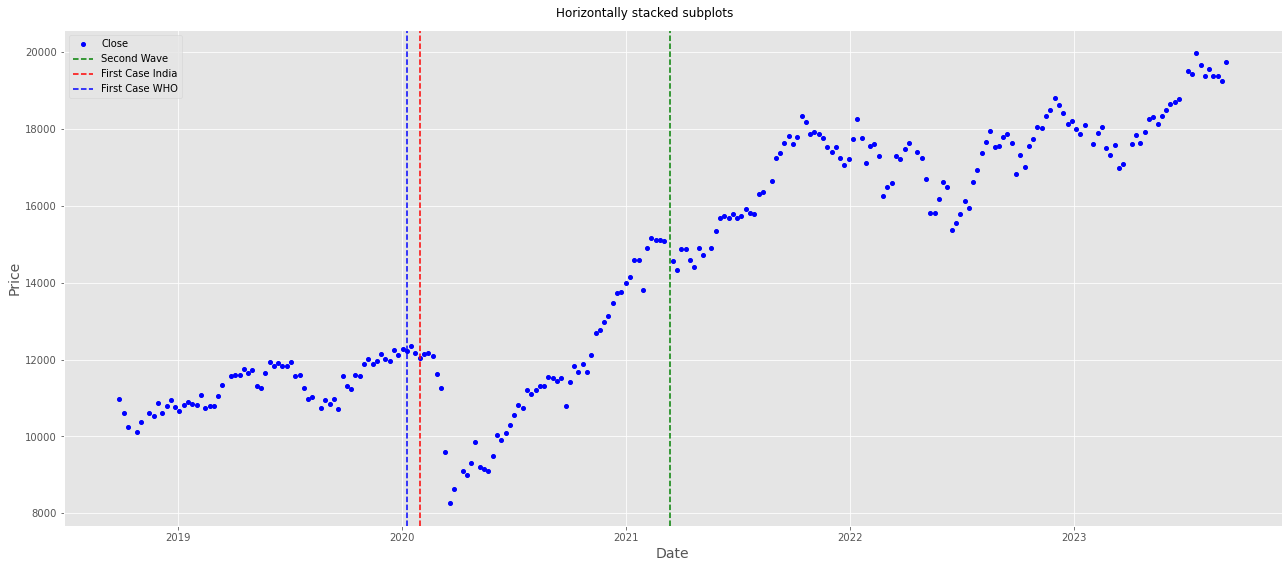

In [26]:
fig, ax = plt.subplots(figsize=(18,8))
fig.suptitle('Horizontally stacked subplots')
ax.plot(df_thus.Date, df_thus.Close, "ob", label="Close", markersize=4)



# ax.axvline(First_wave_start, color='grey', linestyle='--', label='First Wave')
ax.axvline(Second_wave_start, color='green', linestyle='--', label='Second Wave')
ax.axvline(first_news_india, color='Red', linestyle='--', label='First Case India')
ax.axvline(first_news_worldwide, color='blue', linestyle='--', label='First Case WHO')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig("../plots/Nifty50_optionExpiry.png", dpi=400)
plt.show()
plt.close()


In [13]:
magnified = df.loc[(df["Date"] > nov_2019) & (df["Date"] < Second_wave_start)]

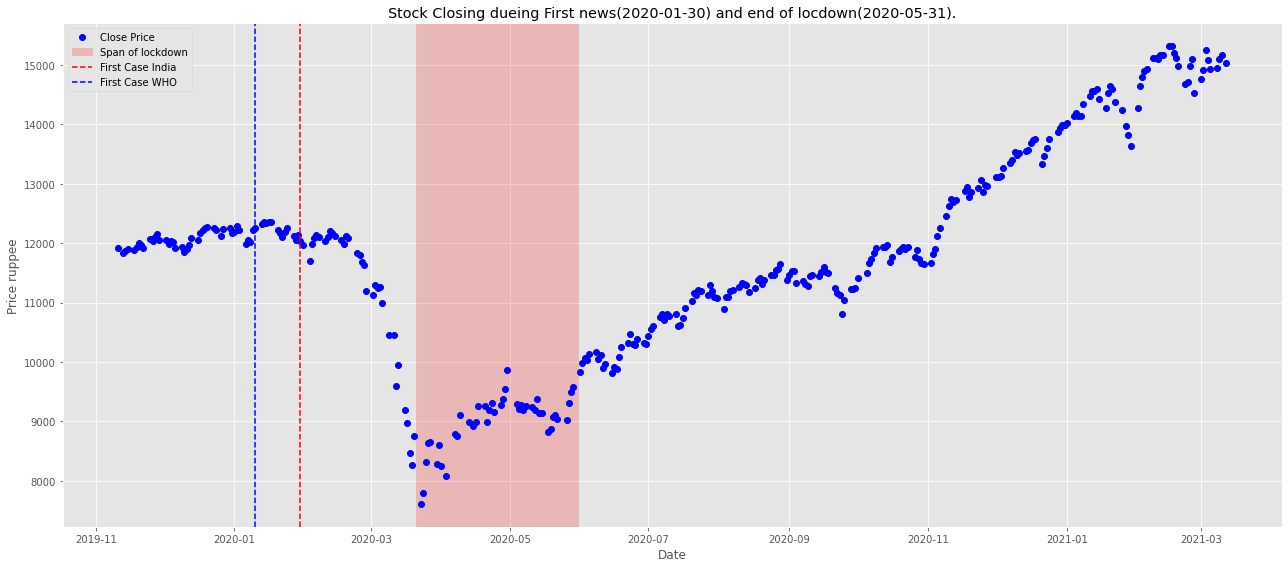

In [27]:
fig, ax = plt.subplots(figsize=(18,8))
plt.title("Stock Closing dueing First news(2020-01-30) and end of locdown(2020-05-31).")
ax.plot(magnified["Date"], magnified["Close"], "ob", label="Close Price")
ax.axvspan(First_wave_start, First_wave_end, color="red", alpha=0.2, label="Span of lockdown")
ax.axvline(first_news_india, color='Red', linestyle='--', label='First Case India')
ax.axvline(first_news_worldwide, color='blue', linestyle='--', label='First Case WHO')


plt.legend()
plt.xlabel("Date")
plt.ylabel("Price ruppee")
plt.tight_layout()
# plt.savefig(f"{outpath_plot}/Nifty50_covidFall.png", dpi=400)
plt.show()
plt.close()

In [ ]:
magnified["movement"] = (magnified.Open -magnified.Close).copy()
magnified['color_pl'] = ['red' if pl < 0 else f'green' for pl in magnified["movement"]].copy()
magnified['Value'] = [abs(pl) if pl < 0 else abs(pl) for pl in magnified["movement"]].copy()

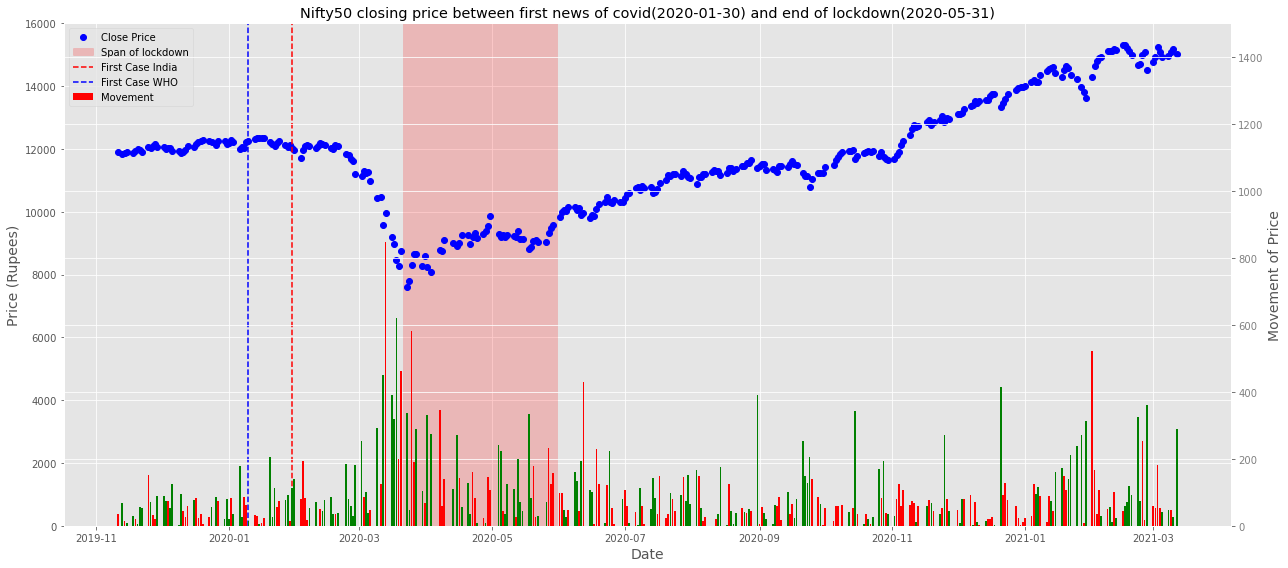

In [29]:
fig, ax = plt.subplots(figsize=(18, 8))
plt.title("Nifty50 closing price between first news of covid(2020-01-30) and end of lockdown(2020-05-31)")
ax.plot(magnified["Date"], magnified["Close"], "ob",label="Close Price")


ax.axvspan(First_wave_start, First_wave_end, color="red", alpha=0.2, label="Span of lockdown")
ax.axvline(first_news_india, color='Red', linestyle='--', label='First Case India')
ax.axvline(first_news_worldwide, color='blue', linestyle='--', label='First Case WHO')


ax.set_ylim(0, 16000)
plt.ylabel("Price (Rupees)", fontsize=14)
plt.xlabel("Date", fontsize=14)

ax2 = ax.twinx()
colors = [color for color in magnified["color_pl"]]
ax2.set_ylabel('Movement of Price', fontsize=14)
ax2.set_ylim(0, 1500)
ax2.tick_params(axis='y', labelcolor='grey')
ax2.bar(magnified["Date"], magnified["Value"], color=colors, label="Movement")

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc="upper left")

plt.tight_layout()
plt.show()
# plt.savefig(f"{outpath_plot}/Nifty50_movement.png", dpi=400)
plt.close()


<h2>NIFTY WITH INDIA VIX</h2>

In [6]:
base_path = "/home/satyukt/Sarthak/repository/NSE_analysis_duringCovid/csv/india_vix/"
csv_dir = os.listdir(base_path)

In [7]:
df_list = [] 
for file in csv_dir:
    fd = pd.read_csv(f"{base_path}{file}")
    df_list.append(fd)
df_vix = pd.concat(df_list, axis=0)

df_vix.columns = df_vix.columns.str.strip()

df_vix = df_vix.rename(columns={
    'Date': 'Date',
    'Open': 'Open',
    'Close': 'Close',
    'Prev. Close': 'Prev_close',
    'Change': 'Change',
    '% Change': '%_change'
})
df_vix["Date"] = pd.to_datetime(df_vix["Date"])
df_vix = df_vix.sort_values(by="Date")
df_vix.to_csv(f"{out_path_csv}/indiaVix_2018_23.csv", index=False)

In [12]:
df_vix.head(5)

,Date,Open,High,Low,Close,Prev_close,Change,%_change
0,2018-09-14,14.2500,14.2500,12.3225,13.8425,14.2500,-0.41,-2.86
1,2018-09-17,13.8425,14.6350,11.7300,14.4950,13.8425,0.65,4.71
2,2018-09-18,14.4950,14.6200,11.8725,14.4150,14.4950,-0.08,-0.55
3,2018-09-19,14.4150,14.4775,11.7450,14.0050,14.4150,-0.41,-2.84
4,2018-09-21,14.0050,16.9200,10.9825,15.5350,14.0050,1.53,10.92


In [11]:
vix_magnified = df_vix.loc[(df_vix["Date"] > nov_2019) & (df_vix["Date"] < Second_wave_start)]

In [15]:
vix_magnified.head(5)

,Date,Open,High,Low,Close,Prev_close,Change,%_change
37,2019-11-11,15.8550,16.7650,15.1950,16.2500,15.8550,0.39,2.49
38,2019-11-13,16.2500,16.6700,14.4725,16.4625,16.2500,0.21,1.31
39,2019-11-14,16.4625,16.4625,14.0925,15.6500,16.4625,-0.81,-4.94
40,2019-11-15,15.6500,15.6500,12.5225,15.0300,15.6500,-0.62,-3.96
41,2019-11-18,15.0300,16.0650,12.6650,15.7550,15.0300,0.73,4.82


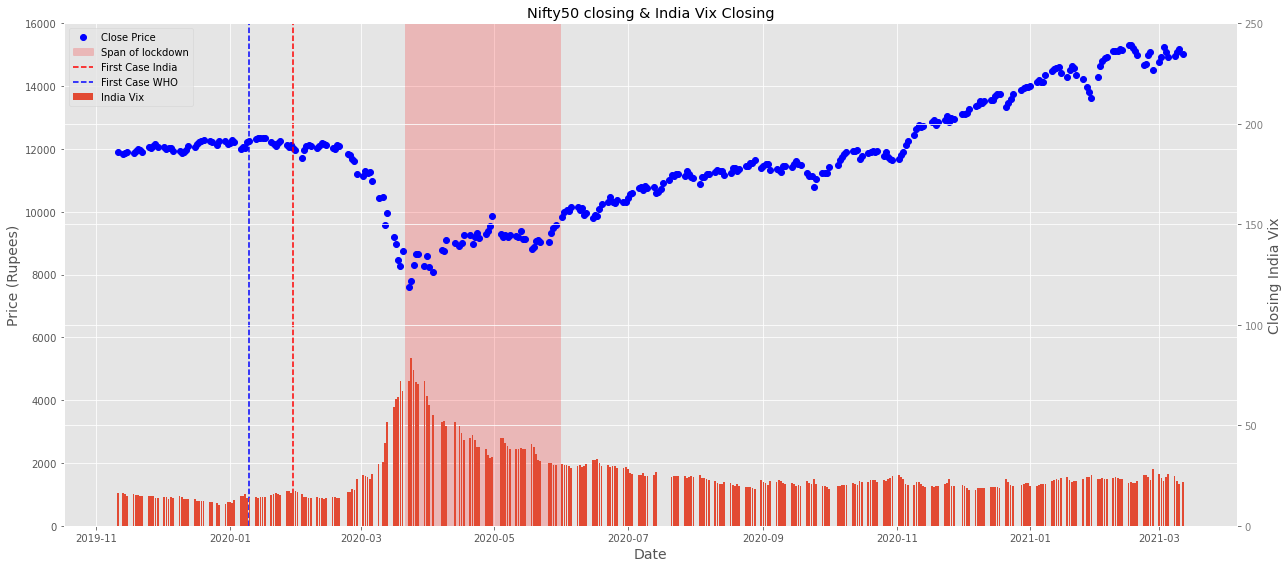

In [22]:
fig, ax = plt.subplots(figsize=(18, 8))
plt.title("Nifty50 closing & India Vix Closing")
ax.plot(magnified["Date"], magnified["Close"], "ob",label="Close Price")


ax.axvspan(First_wave_start, First_wave_end, color="red", alpha=0.2, label="Span of lockdown")
ax.axvline(first_news_india, color='Red', linestyle='--', label='First Case India')
ax.axvline(first_news_worldwide, color='blue', linestyle='--', label='First Case WHO')


ax.set_ylim(0, 16000)
plt.ylabel("Price (Rupees)", fontsize=14)
plt.xlabel("Date", fontsize=14)

ax2 = ax.twinx()
ax2.set_ylabel('Closing India Vix', fontsize=14)
ax2.set_ylim(0, 250)
ax2.tick_params(axis='y', labelcolor='grey')
ax2.bar(vix_magnified["Date"], vix_magnified["Close"], label="India Vix")

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc="upper left")

plt.tight_layout()
plt.savefig(f"{outpath_plot}/Nifty50_indiaVix.png", dpi=400)
plt.show()
plt.close()


<h3>Let's take one month time to check if at all India vix indice can be used to predict trend reversal.</h3>

In [65]:
test_1_start = pd.to_datetime("2021-09-01") 
test_1_end = pd.to_datetime("2021-12-01") 

In [64]:
nifty_test_2021 = df.loc[(df["Date"] >= test_1_start) & (df["Date"] < test_1_end)] 
vix_test_2021 = df_vix.loc[(df_vix["Date"] >= test_1_start) & (df_vix["Date"] < test_1_end)]

KeyError: 0